## Deutsch-Jozsa Algorithm

The oracle is balanced.
Running on ibmqx2


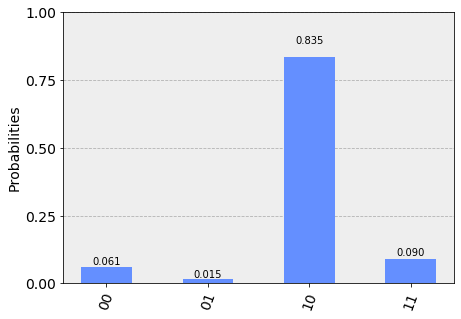

In [8]:
# Deutsch-Jozsa Algorithm
import qiskit
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import IBMQ
import numpy as np
from configparser import RawConfigParser
from qiskit.visualization import *
%matplotlib inline

type = 'real' 

def run(program, type, shots = 1024):
  if type == 'real':
    if not run.isInit:
        parser = RawConfigParser()
        parser.read('config.ini')
        IBMQ.enable_account('4750540e811a9918fc89afb3cf7899216e15b625a5973b40a2165b596b8c904729cdbeafa09d3924f5f71d60c5338cbc32ad4333a48812b27ca9c945ffa6092c','https://api.quantum-computing.ibm.com/api/Hubs/ibm-q/Groups/open/Projects/main')
        run.isInit = True

    # Set the backend server.
    backend = qiskit.providers.ibmq.least_busy(qiskit.IBMQ.backends(simulator=False))

    # Execute the program on the quantum machine.
    print("Running on", backend.name())
    job = qiskit.execute(program, backend)
    output = job.result().get_counts()
    return output
  else:
    # Execute the program in the simulator.
    print("Running on the simulator.")
    job = qiskit.execute(program, qiskit.BasicAer.get_backend('qasm_simulator'), shots=shots)
    return job.result().get_counts()

run.isInit = False

# Set the length of the input array to check.
n = 2

# Choose a random type and value for the oracle function.
oracleType = 1 #np.random.randint(2)
oracleValue = np.random.randint(2)

if oracleType == 0:
    print("The oracle is constant.") 
else:
       print("The oracle is balanced.")

# Create n + 1 qubits for the input array, all initialized to zero, with an extra qubit for storing the answer.
qr = QuantumRegister(n + 1)
# Create n registers for the output.
cr = ClassicalRegister(n)
program = QuantumCircuit(qr, cr)

# Put all input qubits into superposition.
for i in range(n):
  program.h(qr[i])

# Invert the last qubit (which stores the answer) and place it into superposition.
program.x(qr[n])
program.h(qr[n])

program.barrier()

if oracleType == 0:
  # This oracle is constant and returns oracleValue for all inputs.
  if oracleValue == 1:
    # Invert the answer qubit.
    program.x(qr[n])
  else:
    # Keep the answer qubit as-is.
    program.iden(qr[n])
else:
  # The oracle is balanced and returns equal counts of 0 and 1.
  for i in range(n):
    # Set the qubit to return the inner product of the input with a non-zero bitstring.
    if (n & (1 << i)):
      # Apply a controlled-not between the input qubit and the answer qubit.
      program.cx(qr[i], qr[n])


program.barrier()

# Undo the superposition for all input qubits.
for i in range(n):
  program.h(qr[i])

# Measure the result of each input qubit.
program.barrier()
for i in range(n):
  program.measure(qr[i], cr[i])


out = run(program, type)
plot_histogram(out)


In [9]:
program.draw()